In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use("seaborn")

In [2]:
data = pd.read_csv("test.csv", names=["n", "l", "vi", "v", "vf", "s1", "s2", "a"])

In [3]:
data

,n,l,vi,v,vf,s1,s2,a
0,10,236.854386,0.000000,0.000000,0.000000,0.000000,0.000000,100.00000
1,15,10.000000,0.000000,8.333333,44.721360,0.347222,0.347222,100.00000
2,20,2.000000,44.721360,83.333333,48.989795,24.722222,24.722222,100.00000
3,25,98.000000,48.989795,83.333333,52.847008,22.722222,118.758191,100.00000
4,30,31.415927,52.847008,22.360680,52.847008,-13.237523,18.178404,86.60254
5,40,100.000000,52.847008,83.333333,0.000000,20.758191,134.722222,100.00000
6,50,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.00000


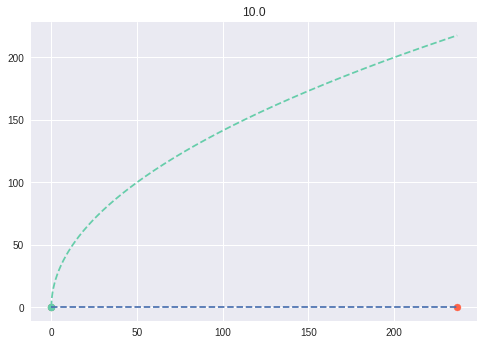

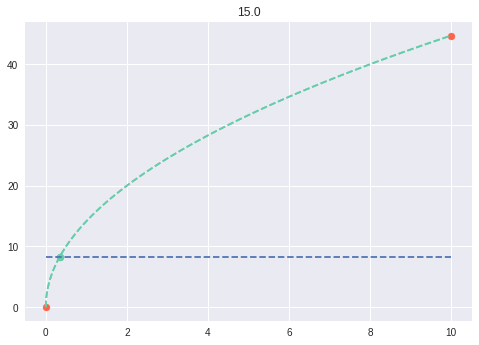

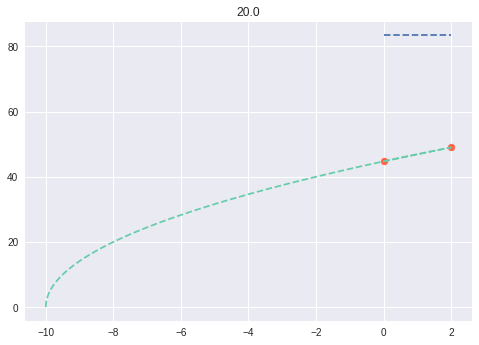

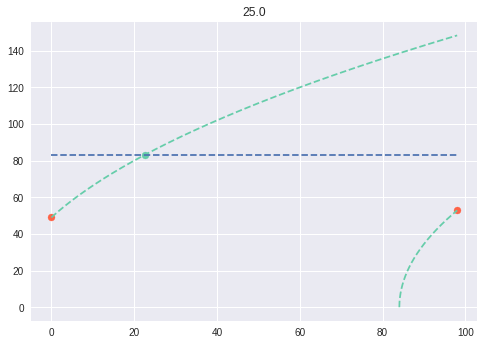

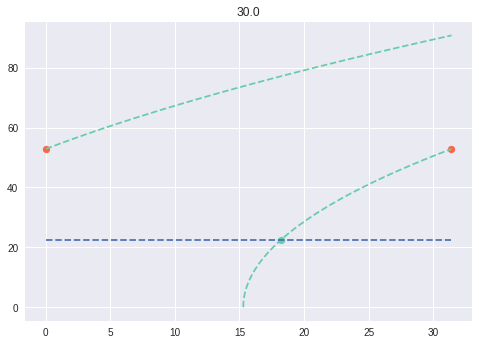

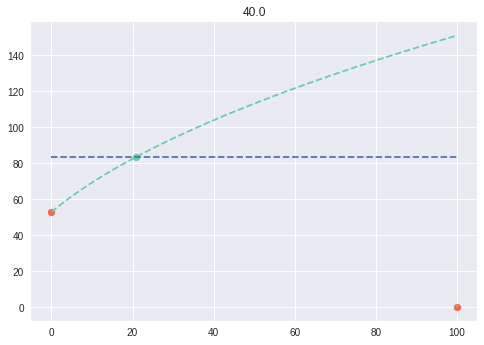

In [14]:
howmany = 6
for i in range(howmany):
    d = data.iloc[i]

    step = 0.01
    s0 = d.l - (d.vf**2)/(2*d.a)
    s_first_point = np.arange(stop=d.l + step, step = step)
    s_second_point = np.arange(start=s0, stop=d.l + step, step=step)

    v1s = np.sqrt(2*d.a * s_first_point + pow(d.vi,2))
    v2s = np.sqrt(2*d.a * (s_second_point-s0))

    plt.title(d.n)
    plt.plot(s_first_point, v1s, linestyle="--", color="mediumaquamarine")
    plt.plot(s_second_point, v2s, linestyle="--", color="mediumaquamarine")

    plt.scatter(0, d.vi, color="tomato")
    plt.scatter(d.l, d.vf,  color="tomato")
    plt.hlines(d.v, 0, d.l, linestyle='--')

    if d.s1 >= 0 and d.s1 <= d.l: plt.scatter(d.s1, d.v, color="mediumaquamarine")
    if d.s2 <= d.l and d.s2 >= 0: plt.scatter(d.s2, d.v,color="mediumaquamarine") 

    plt.show()
    


In [5]:
v1s = np.sqrt(2*d.a * s + pow(d.vi,2))

NameError: name 's' is not defined

In [11]:
s0

15.291652500937595